🟢 Bloc 1 – Chargement des données nettoyées

In [12]:
# 📦 Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 🎨 Style graphique
sns.set(style="whitegrid")

# 📁 Chargement des données nettoyées
df = pd.read_csv("../PROJET IA_M1/data/processed/cleaned_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Expiration_date"] = pd.to_datetime(df["Expiration_date"])

# ✅ Aperçu rapide
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Shelf_life_days,Expiration_date
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,30,2019-02-04
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,90,2019-06-06
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,45,2019-04-17
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,30,2019-02-26
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,60,2019-04-09


📌 Visualisation 1 : Répartition des ventes par catégorie de produit
Cette visualisation montre les catégories les plus représentées dans les ventes. Elle permet d’identifier les types de produits à surveiller pour éviter les excès de stock ou le gaspillage.

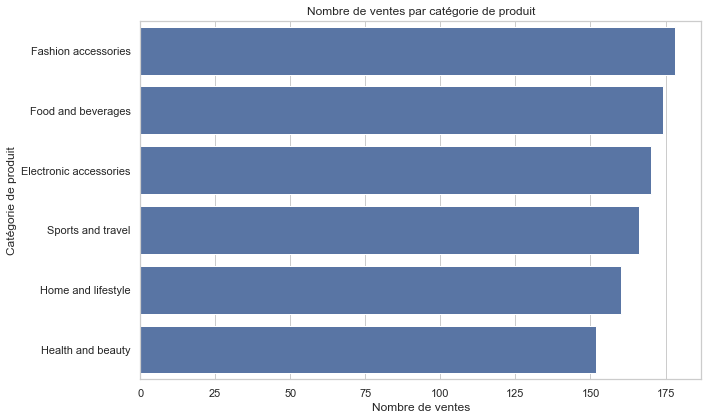

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="Product line", order=df["Product line"].value_counts().index)
plt.title("Nombre de ventes par catégorie de produit")
plt.xlabel("Nombre de ventes")
plt.ylabel("Catégorie de produit")
plt.tight_layout()
plt.show()

📌 Visualisation 2 : Évolution des ventes journalières
Ce graphique permet d’observer les tendances de vente au fil du temps, utile pour la prévision et l’ajustement des commandes.

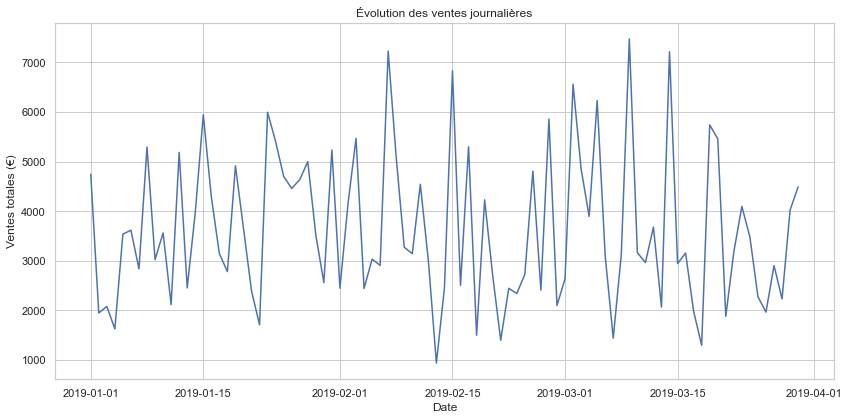

In [14]:
daily_sales = df.groupby("Date")["Sales"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x="Date", y="Sales")
plt.title("Évolution des ventes journalières")
plt.xlabel("Date")
plt.ylabel("Ventes totales (€)")
plt.tight_layout()
plt.show()

Visualisation 3 : Quantités vendues par catégorie
On analyse ici les volumes totaux vendus par type de produit, ce qui aide à repérer les produits à forte rotation ou à fort risque de surstock.

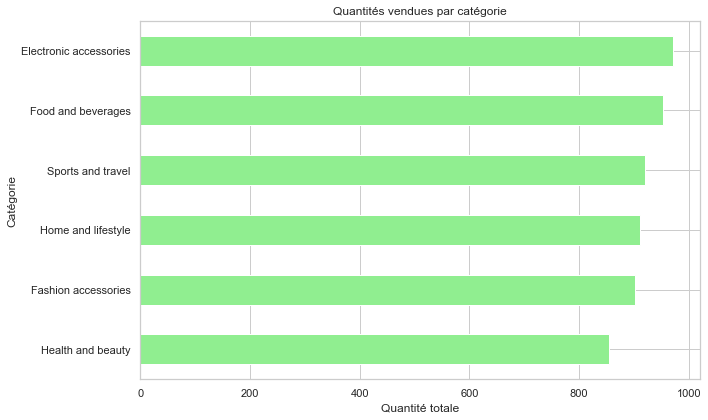

In [15]:
top_quantities = df.groupby("Product line")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_quantities.plot(kind="barh", color="lightgreen")
plt.title("Quantités vendues par catégorie")
plt.xlabel("Quantité totale")
plt.ylabel("Catégorie")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

📌 Visualisation 4 : Répartition des ventes par ville
Cette répartition géographique aide à ajuster les commandes selon les zones. Chaque ville peut avoir des dynamiques de consommation différentes.

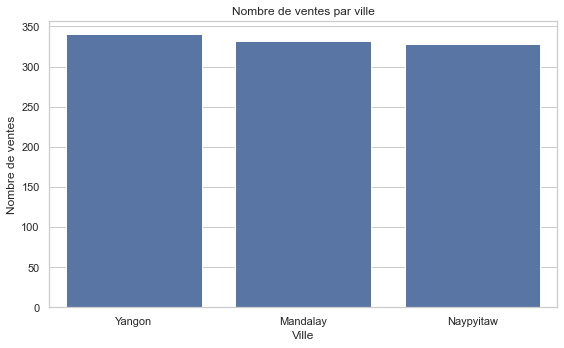

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="City", order=df["City"].value_counts().index)
plt.title("Nombre de ventes par ville")
plt.xlabel("Ville")
plt.ylabel("Nombre de ventes")
plt.tight_layout()
plt.show()

📌 Visualisation 5 : Durée restante avant péremption par catégorie
Ce graphique montre la moyenne des jours restants avant expiration, par type de produit. Cela aide à repérer les catégories les plus “à risque” en termes de produits proches de la date limite.

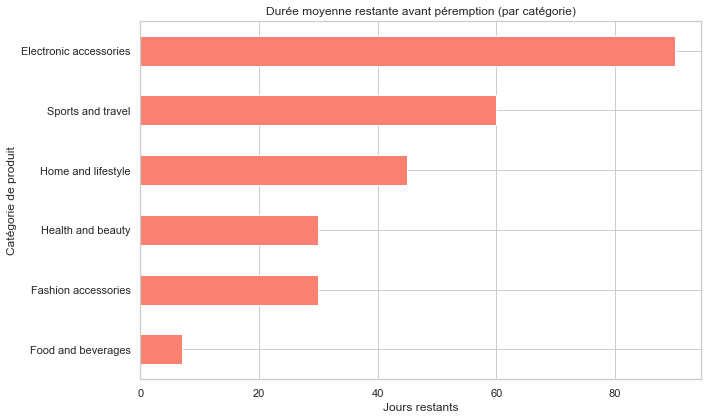

In [18]:
# 🧮 Calcul de la durée restante avant péremption
df["Jours_restants"] = (df["Expiration_date"] - df["Date"]).dt.days

# 📊 Moyenne des jours restants par type de produit
moyenne_par_categorie = df.groupby("Product line")["Jours_restants"].mean().sort_values()

# 📈 Graphique
plt.figure(figsize=(10, 6))
moyenne_par_categorie.plot(kind="barh", color="salmon")
plt.title("Durée moyenne restante avant péremption (par catégorie)")
plt.xlabel("Jours restants")
plt.ylabel("Catégorie de produit")
plt.tight_layout()
plt.show()

🧠 Génération des alertes dans le notebook
Ce bloc applique les règles métier pour détecter les produits en surstock ou proches de la péremption.

In [19]:
# 📅 Date du jour
today = datetime.today()

# 🛎️ Fonction d’alerte
def check_alert(row):
    if row["Expiration_date"] <= today + timedelta(days=2):
        return "Produit à date courte - PROMO/DON"
    elif row["Quantity"] > df["Quantity"].mean() + df["Quantity"].std():
        return "Surstock - Ajuster commande"
    else:
        return "RAS"

# 🧪 Application de la fonction
df["Alerte"] = df.apply(check_alert, axis=1)

# 🔍 Aperçu des alertes
df[["Date", "Product line", "Quantity", "Expiration_date", "Alerte"]].head()

,Date,Product line,Quantity,Expiration_date,Alerte
0,2019-01-05,Health and beauty,7,2019-02-04,Produit à date courte - PROMO/DON
1,2019-03-08,Electronic accessories,5,2019-06-06,Produit à date courte - PROMO/DON
2,2019-03-03,Home and lifestyle,7,2019-04-17,Produit à date courte - PROMO/DON
3,2019-01-27,Health and beauty,8,2019-02-26,Produit à date courte - PROMO/DON
4,2019-02-08,Sports and travel,7,2019-04-09,Produit à date courte - PROMO/DON


📤 Export vers Power BI

In [20]:

alert_output = df[["Date", "Product line", "Quantity", "Expiration_date", "Alerte", "Sales", "City"]]
alert_output.to_csv("../PROJET IA_M1/Output/alerts.csv", index=False)
print("[✅] Fichier alerts.csv exporté pour Power BI.")

[✅] Fichier alerts.csv exporté pour Power BI.
